# Sample Random Graphs and Datasets

We will generate mixed discrete-continuous and nonlinear observational data based upon the mixed additive noise model (MANM). This will be based on the [MANM python package](https://github.com/hpi-epic/manm-cs).

NOTE: for now, we are only simulating causal DAGs, not ADMGs.

In [1]:
%load_ext lab_black

In [2]:
%load_ext autoreload
%autoreload 2

In [14]:
import os
from pathlib import Path
from pprint import pprint

import numpy as np
import bnlearn as bn
import networkx as nx

import causal_networkx
from causal_networkx.ci import (
    g_square_discrete,
    fisherz,
    g_square_binary,
    Oracle,
    ParentOracle,
)
from causal_networkx.discovery import PC, RobustPC
from causal_networkx.io import load_from_pgmpy
from causal_networkx.simulation.random import simulate_random_graphs_manm_cs
from causal_networkx.io import read_dot

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
np.random.seed(12345)

# Simulate One Graph

In [94]:
n_nodes = 5
edge_density = 0.3
n_samples = 1000
graph, df, builder = simulate_random_graphs_manm_cs(
    n_nodes=n_nodes,
    edge_density=edge_density,
    n_samples=n_samples,
)

(1000, 5)


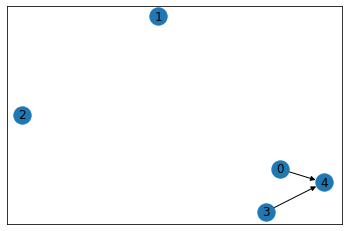

In [95]:
print(graph)
graph.draw()
print(df.shape)

# Try sTfuf

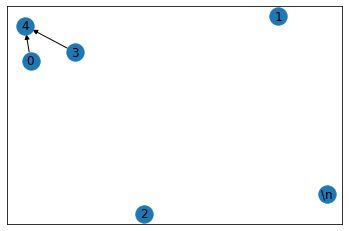

Error in callback <bound method BlackFormatter.format_cell of <lab_black.BlackFormatter object at 0x7fef417a15b0>> (for post_run_cell):


KeyError: '_i103'

In [102]:
test_graph = read_dot(fname)

test_graph.draw()

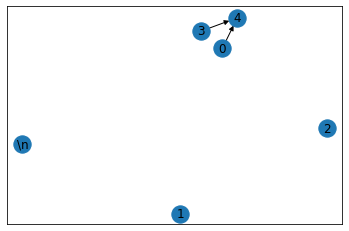

Error in callback <bound method BlackFormatter.format_cell of <lab_black.BlackFormatter object at 0x7fef417a15b0>> (for post_run_cell):


KeyError: '_i104'

In [103]:
test_graph = read_dot(fname)

test_graph.draw()

In [74]:
import pydot

str_graph = graph.to_dot_graph()
print(str_graph)
dot_graph = pydot.graph_from_dot_data(str_graph)
# print(dot_graph[0].to_string())

nx_graph = nx.DiGraph()
nx_graph.add_edges_from(graph.edges)
nx_graph.add_nodes_from(graph.nodes)
pydot_graph = nx.nx_pydot.to_pydot(nx_graph)
print(pydot_graph)
# print(str(dot_graph))

strict digraph	{
0;
1;
2;
3;
4;0 -> 4;
3 -> 4;
}
strict digraph  {
0;
4;
3;
1;
2;
0 -> 4;
3 -> 4;
}



In [75]:
help(pydot.Dot.write)

Help on function write in module pydot:

write(self, path, prog=None, format='raw', encoding=None)
    Writes a graph to a file.
    
    Given a filename 'path' it will open/create and truncate
    such file and write on it a representation of the graph
    defined by the dot object in the format specified by
    'format' and using the encoding specified by `encoding` for text.
    The format 'raw' is used to dump the string representation
    of the Dot object, without further processing.
    The output can be processed by any of graphviz tools, defined
    in 'prog', which defaults to 'dot'
    Returns True or False according to the success of the write
    operation.
    
    There's also the preferred possibility of using:
    
        write_'format'(path, prog='program')
    
    which are automatically defined for all the supported formats.
    [write_ps(), write_gif(), write_dia(), ...]
    
    The encoding is passed to `open` [1].
    
    [1] https://docs.python.org/3/librar

In [71]:
str_graph = graph.to_dot_graph()
print(str_graph)

# As a bytes literal:
output_graphviz_dot = pydot_graph.create_dot()
print(output_graphviz_dot)

strict digraph	{
0;
1;
2;
3;
4;
0 -> 4;
3 -> 4;
}
b'strict digraph {\n\tgraph [bb="0,0,270,108"];\n\tnode [label="\\N"];\n\t0\t[height=0.5,\n\t\tpos="27,90",\n\t\twidth=0.75];\n\t4\t[height=0.5,\n\t\tpos="63,18",\n\t\twidth=0.75];\n\t0 -> 4\t[pos="e,54.696,35.147 35.35,72.765 39.712,64.283 45.147,53.714 50.041,44.197"];\n\t3\t[height=0.5,\n\t\tpos="99,90",\n\t\twidth=0.75];\n\t3 -> 4\t[pos="e,71.304,35.147 90.65,72.765 86.288,64.283 80.853,53.714 75.959,44.197"];\n\t1\t[height=0.5,\n\t\tpos="171,90",\n\t\twidth=0.75];\n\t2\t[height=0.5,\n\t\tpos="243,90",\n\t\twidth=0.75];\n}\n'


In [76]:
graph.save(fname="/Users/adam2392/Downloads/test.dot")

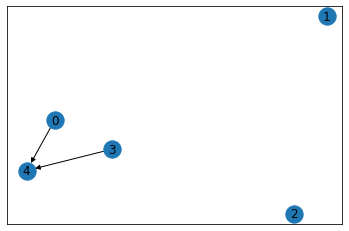

In [80]:
graph.draw()
print(graph)

In [93]:
print(nx.__version__)

2.7.1


In [90]:
nx_graph = nx.DiGraph(graph.edges)
nx_graph.add_nodes_from(graph.nodes)
print(nx_graph.nodes)
pydot_graph = nx.nx_pydot.to_pydot(nx_graph)
print(pydot_graph)
nx.nx_pydot.write_dot(nx_graph, "/Users/adam2392/Downloads/test.dot")

[0, 4, 3, 1, 2]
strict digraph  {
0;
4;
3;
1;
2;
0 -> 4;
3 -> 4;
}



digraph G {
0;
4;
3;
1;
2;
0 -> 4;
3 -> 4;
"\n";
}



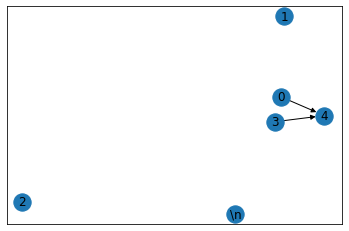

In [88]:
import pydot

pygraph = pydot.graph_from_dot_file(
    "/Users/adam2392/Downloads/test.dot", encoding="utf8"
)[0]
print(pygraph.to_string())
# nx_graph = nx.drawing.nx_pydot.from_pydot(graph)
read_graph = read_dot("/Users/adam2392/Downloads/test.dot")

print(read_graph)
read_graph.draw()

# Simulate Now Many Graphs and Save to Dataset

Each graph is defined by a set of parameters in the MANM module:

- number of nodes
- edge density (0 to 1)
- discrete node ratio
- discrete SNR
- number of discrete classes
- continuous noise std
- function type ([linear, quadratic, cubic, tanh, sin, cos])

In [31]:
idx = 0
output_dir = '~/
fname = f"graph_{idx}.dot"
json_fname = f"graph_{idx}.json"

json_dict = {
    "idx": idx,
    "n_nodes": builder.num_nodes,
    "n_samples": n_samples,
    "edge_density": builder.edge_density,
    "discrete_node_ratio": builder.discrete_node_ratio,
    "conditional_gaussian": builder.conditional_gaussian,
    "discrete_signal_to_noise_ratio": builder.discrete_signal_to_noise_ratio,
    "min_discrete_value_classes": builder.min_discrete_value_classes,
    "max_discrete_value_classes": builder.max_discrete_value_classes,
    "continuous_noise_std": builder.continuous_noise_std,
    "beta_lower_limit": builder.beta_lower_limit,
    "beta_upper_limit": builder.beta_upper_limit,
    "functions": builder.functions,
}

In [36]:
for discrete_node_ratio in np.linspace(0, 1, 11):
    print(discrete_node_ratio)

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0


In [ ]:
n_samples = 1000
discrete_node_ratio = 0.5

# TODO: see if literature has hints on setting alpha
# todo: causal structure learning for correcting for pvalues
# during local learning i.e. X \perp Y | Z
#
# IDEAS: 
# - correction based on statistical information aka FDR/Bonf
# - correction based on some non-causal structure aka adjacency paths
# 
# discrete_node_ratio is 0 -> maybe use partial corr, or KCI if insufficient
# start with functions = linear
alpha = # iterate over various numbers


for n_nodes in range(5, 15):
    for edge_density in np.linspace(0.1, 0.9, 9):
        # for discrete_node_ratio in np.linspace(0, 1, 11):
            graph, df, builder = simulate_random_graphs_manm_cs(
                n_nodes=n_nodes,
                edge_density=edge_density,
                n_samples=n_samples,
            )